<a href="https://colab.research.google.com/github/ajaythakur3369/Prodigy-InfoTech-Internship/blob/main/Hand_Gesture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Hand Gesture Detection**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Prodigy InfoTech**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Prodigy-InfoTech-Internship)**

# **Problem Statement -**

Develop a hand gesture recognition model capable of accurately identifying and classifying various hand gestures from image or video data. This enables intuitive human-computer interaction and gesture-based control systems..

**Dataset -** https://www.kaggle.com/gti-upm/leapgestrecog

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import keras

# For plotting purposes
import matplotlib.pyplot as plt

# Provides a means of utilizing operating system-dependent functionality
import os

# Image manipulation library
import cv2
import numpy as np

# Importing the Keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Access the drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Paths to the dataset
data_path = "/content/drive/MyDrive/Colab_Notebook/Internship_Name/Prodigy_InfoTech/Folder_Name/Hand_gesture_recognition_dataset"

In [ ]:
# Loading the images and their corresponding classes (0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 4, 5, ..., 3, 3, 5],
        [5, 4, 5, ..., 3, 4, 4],
        [5, 5, 7, ..., 4, 4, 4],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [6, 5, 6, ..., 5, 5, 3],
        [5, 8, 6, ..., 5, 5, 5]], dtype=uint8),
 4]

In [ ]:
# Shuffle the input data
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [ ]:
label[:10]

[8, 3, 0, 4, 5, 0, 8, 0, 6, 9]

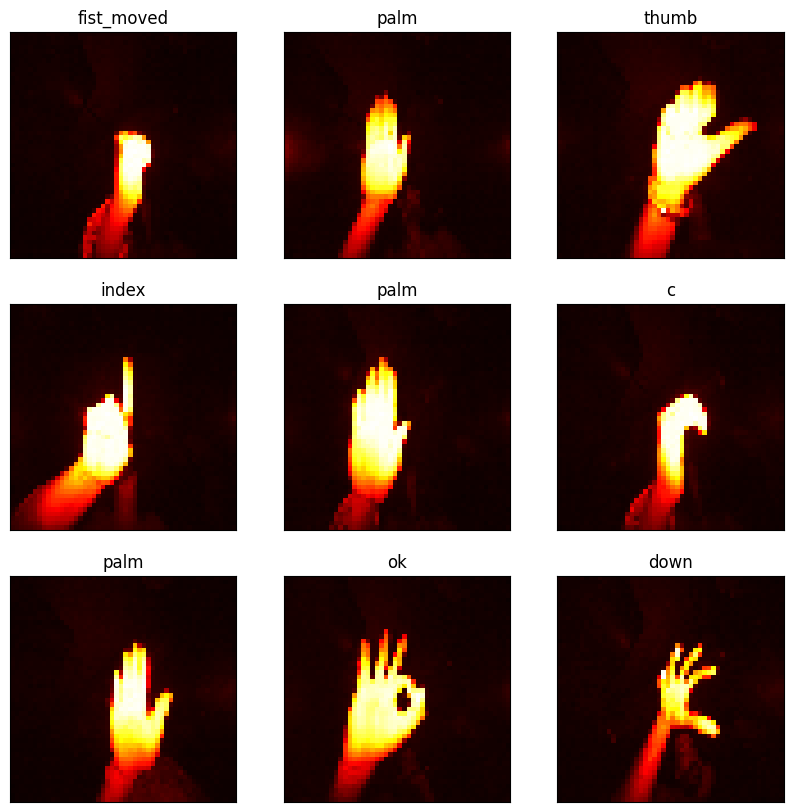

In [ ]:
plt.figure(1, figsize = (10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap = 'hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(15236, 50, 50)

In [ ]:
# Performing one-hot encoding
label = keras.utils.to_categorical(label, num_classes = 10, dtype = 'i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int8)

In [ ]:
# Reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
# Splitting the input data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state = 0)

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
334/334 [==============================] - 95s 279ms/step - loss: 0.4298 - accuracy: 0.8608 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 2/10
334/334 [==============================] - 95s 285ms/step - loss: 0.0213 - accuracy: 0.9938 - val_loss: 0.0060 - val_accuracy: 0.9972
Epoch 3/10
334/334 [==============================] - 94s 282ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 4/10
334/334 [==============================] - 88s 264ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 5/10
334/334 [==============================] - 87s 259ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 0.9993
Epoch 6/10
334/334 [==============================] - 87s 262ms/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 7/10
334/334 [==============================] - 85s 254ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0011 - val_ac

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

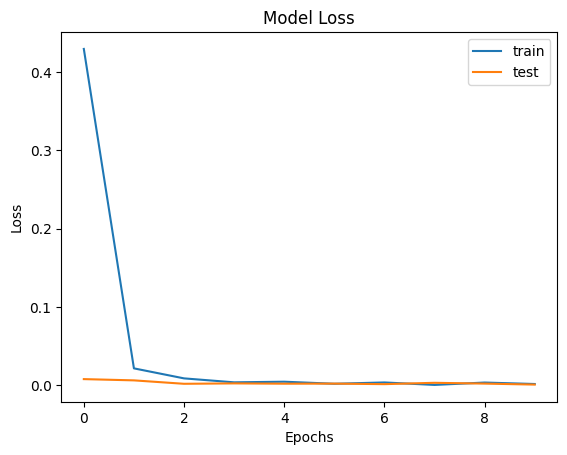

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

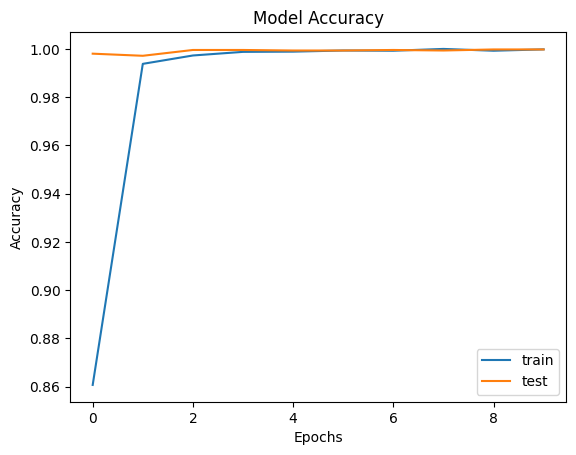

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

143/143 [==============================] - 10s 70ms/step


[]

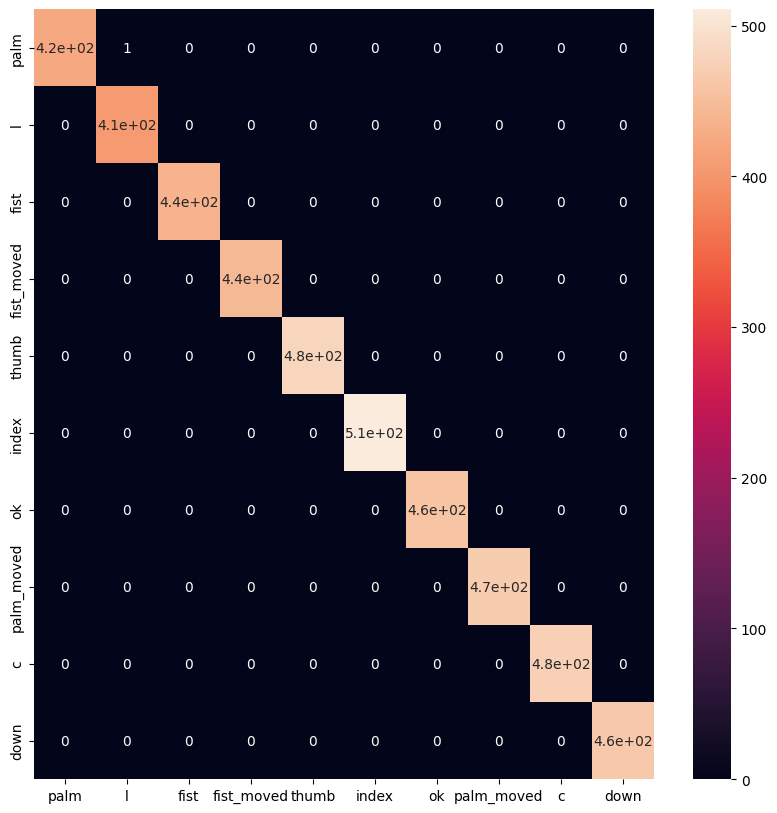

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize = (10, 10))
cm = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(model.predict(X_test), axis = 1))
sn.heatmap(cm, annot = True, xticklabels = cat, yticklabels = cat)
plt.plot()

In [ ]:
# Calculating loss and accuracy on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

143/143 [==============================] - 8s 55ms/step - loss: 5.6311e-04 - accuracy: 0.9998
Test accuracy: 99.98%
